# CHANGE LIGHT BLUE TO TRANSPARENT

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'marioTileMap.png'

# Load image into np array with alpha channel
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
# [x,y,B,G,R,A]
# Get mask where all values where GBRA = 255, 144, 146, 255
mask = np.all(image == [255, 144, 146, 255], axis=-1)
# Set alpha channel to 0 where mask is true
image[mask] = [255, 255, 255, 0]
# Plot BGR

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Save image
# cv2.imwrite('marioTileMap.png', image)

/var/folders/8c/_h15jcf91vb8cy0z6q70gc580000gn/T/ipykernel_93764/1990247811.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  mask = np.all(image == [255, 144, 146, 255], axis=-1)


ValueError: shape mismatch: value array of shape (4,) could not be broadcast to indexing result of shape (0,436,584,3)

In [59]:
mario = {
    'big': {
        'idle': {'x':0, 'y':32, 'w':16, 'h':32},
        'walk': [{'x':20, 'y':32, 'w':16, 'h':32}, {'x':38, 'y':32, 'w':16, 'h':32}, {'x':56, 'y':32, 'w':16, 'h':32}],
        'break': {'x':76, 'y':32, 'w':16, 'h':32},
        'jump': {'x':96, 'y':32, 'w':16, 'h':32},
        'dead': {'x':116, 'y':32, 'w':16, 'h':32}
    },
    'small': {
        'idle': {'x':0, 'y':8, 'w':16, 'h':16},
        'walk': [{'x':20, 'y':8, 'w':16, 'h':16}, {'x':38, 'y':8, 'w':16, 'h':16}, {'x':56, 'y':8, 'w':16, 'h':16}],
        'break': {'x':76, 'y':8, 'w':16, 'h':16},
        'jump': {'x':96, 'y':8, 'w':16, 'h':16},
        'dead': {'x':116, 'y':8, 'w':16, 'h':16}
    }
}

# def displayImage(image, cropData):
#     x, y, w, h = cropData['x'], cropData['y'], cropData['w'], cropData['h']
#     plt.figure(figsize=(1,1))
#     plt.imshow(cv2.cvtColor(image[y:y+h, x:x+w], cv2.COLOR_BGR2RGB))
#     plt.pause(0.5)
#     plt.show()


# def display_tilemap(image, tilemap):
#     print("Big")
#     for size in ['big', 'small']:
#         print("Idle")
#         displayImage(image, tilemap[size]['idle'])
#         print("Walk")
#         for frame in tilemap[size]['walk']:
#             displayImage(image, frame)
#         print("Break")
#         displayImage(image, tilemap[size]['break'])
#         print("Jump")
#         displayImage(image, tilemap[size]['jump'])
    
# display_tilemap(image, mario)

True

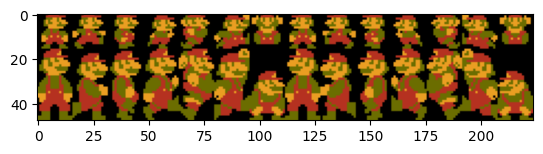

In [60]:
# Generate New Tilemap

mario_new = {
    'small': {
        'idle': {'x':0, 'y':0, 'w':16, 'h':16},
        'walk': [{'x':16, 'y':0, 'w':16, 'h':16}, {'x':32, 'y':0, 'w':16, 'h':16}, {'x':48, 'y':0, 'w':16, 'h':16}],
        'break': {'x':64, 'y':0, 'w':16, 'h':16},
        'jump': {'x':80, 'y':0, 'w':16, 'h':16},
        'dead': {'x':96, 'y':0, 'w':16, 'h':16},
    },
    'big': {
        'idle': {'x':0, 'y':16, 'w':16, 'h':32},
        'walk': [{'x':16, 'y':16, 'w':16, 'h':32}, {'x':32, 'y':16, 'w':16, 'h':32}, {'x':48, 'y':16, 'w':16, 'h':32}],
        'break': {'x':64, 'y':16, 'w':16, 'h':32},
        'jump': {'x':80, 'y':16, 'w':16, 'h':32},
        'dead': {'x':96, 'y':16, 'w':16, 'h':32},
    },
}

n_sides = 7

tileMap = np.zeros(((16+32), 16*n_sides*2, 4), dtype=np.uint8)

def copyTile(oldPos, newPos, direction):
    x,y,h,w = oldPos['x'], oldPos['y'], oldPos['h'], oldPos['w']
    n_x, n_y, n_h, n_w = newPos['x'], newPos['y'], newPos['h'], newPos['w']
    
    img = image[y:y+h, x:x+w]
    if direction == 'right':
        newPos['x'] = newPos['x'] + 16*n_sides
    else: 
        img = cv2.flip(img, 1)
    
    tileMap[n_y:n_y+n_h, n_x:n_x+n_w] = img
    

for direction in ['right', 'left']:
    for size in ['small', 'big']:
        # Move idle
        copyTile(mario[size]['idle'], mario_new[size]['idle'], direction)
        # Move walk
        for i, frame in enumerate(mario[size]['walk']):
            copyTile(frame, mario_new[size]['walk'][i], direction)
        # Move break
        copyTile(mario[size]['break'], mario_new[size]['break'], direction)
        # Move jump
        copyTile(mario[size]['jump'], mario_new[size]['jump'], direction)
        # Move dead
        copyTile(mario[size]['dead'], mario_new[size]['dead'], direction)


plt.imshow(cv2.cvtColor(tileMap, cv2.COLOR_BGR2RGB))

cv2.imwrite('mario.png', tileMap)

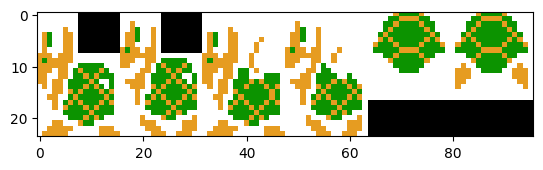

In [68]:
# Turtle 

import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'turtleInput.png'

# Load image into np array with alpha channel
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
# [x,y,B,G,R,A]
# Get mask where all values where GBRA = 255, 144, 146, 255
mask = np.all(image == [255, 144, 146, 255], axis=-1)
# Set alpha channel to 0 where mask is true
image[mask] = [255, 255, 255, 0]
# Plot BGR

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

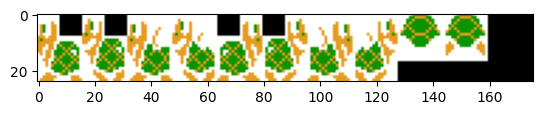

In [90]:
# 
turtle = {
    'idle': {'x':0, 'y':0, 'w':16, 'h':24},
    'walk': [{'x':16, 'y':0, 'w':16, 'h':24}, {'x':32, 'y':0, 'w':16, 'h':24}],
    'fly': [{'x':48, 'y':0, 'w':16, 'h':24}, {'x':64, 'y':0, 'w':16, 'h':24}],
    'shell': {'x':80, 'y':0, 'w':16, 'h':16},
    'shellStanding': {'x':96, 'y':0, 'w':16, 'h':24},
}


n_sides = 4
shell_size = 3

new_image = np.zeros((24, 16*(n_sides*2+shell_size) , 4), dtype=np.uint8)
# Paste image
new_image[0:24, 0:16*n_sides,:] = image[0:24, 0:16*n_sides,:]
for i in range(n_sides):
    # Paste each image flipped
    new_image[0:24, 16*i + 16*n_sides:16*(i+1) + 16*n_sides,:] = cv2.flip(image[0:24, 16*i:16*(i+1),:], 1)
    
# Paste first two shell images
new_image[0:24, 16*n_sides*2:16*n_sides*2+ 16* 2,:] = image[0:24, 16*n_sides:16*n_sides+ 16* 2,:]
# Paste last shell image which is a verflipped version of the first
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
